In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
df = pd.read_csv('xarray-dask.csv')

In [22]:
df.columns

Index(['machine', 'workload', 'op', 'fs', 'time'], dtype='object')

In [23]:
# convert from %H:%M:%S strings to num. seconds
df['time'] = df['time'].apply(lambda x: (int(x.split(':')[0]) * 360) + (int(x.split(':')[1]) * 60) + float(x.split(':')[2]) )

In [24]:
gb = df[df['fs'] != 'tmpfs'].groupby(['machine', 'workload','fs'])

# get the sum of copy/exec operations for in-memory filesystems
sums = gb['time'].sum()

# flatten the index
sums = sums.reset_index()

(0, 200.0)

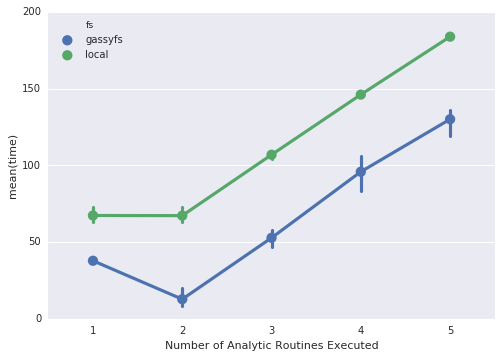

In [32]:
sb_plot = sb.pointplot(x="workload", y="time", hue="fs", data=sums)
sb_plot.set_xticklabels(['1','2','3','4','5'])
sb_plot.set_xlabel('Number of Analytic Routines Executed')
sb_plot.set_ylim(0)

In [33]:
# generate png file
sb_plot.get_figure().savefig('xarray-dask.png', bbox_inches='tight', dpi=300)

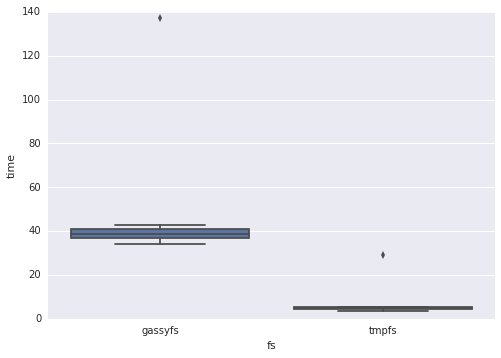

In [11]:
# now show gassyfs variability
df = pd.read_csv('gassyfs-variability.csv')
df['time'] = df['time'].apply(lambda x: (int(x.split(':')[0]) * 360) + (int(x.split(':')[1]) * 60) + float(x.split(':')[2]) )
sb_plot = sb.boxplot(x="fs", y="time", data=df)

In [12]:
sb_plot.get_figure().savefig('gassyfs-variability.png', bbox_inches='tight', dpi=300)